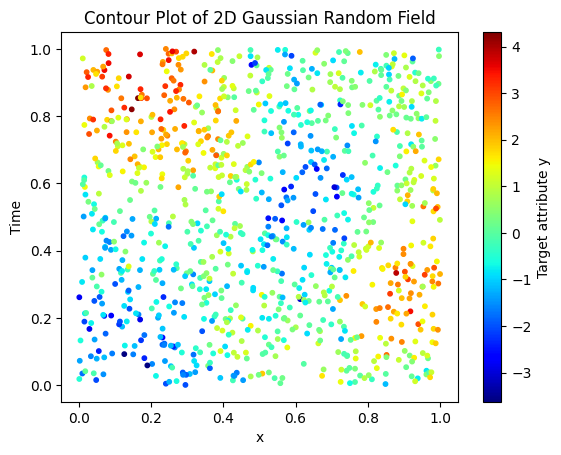

In [1]:
from time import gmtime, strftime
from tqdm import tqdm

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output
# %matplotlib qt
import seaborn as sns

# import stream_generator
import learning_models
from datasets.data_loader import load_dataset

from dth import DTH
import neural_net_base_learner
# import wandb
import os
from utility.logger import Logger, Plotter
from utility.sample import Sample


def generate_2d_gaussian_random_field(num_points, scale):
    # Sample x and y randomly
    x = np.random.uniform(0, 1, num_points)
    t = np.random.uniform(0, 1, num_points)
    
    # Compute the distance matrix
    d = np.sqrt((x[:, None] - x[None, :])**2 + (t[:, None] - t[None, :])**2)
    
    # Define the covariance function
    covariance_func = np.exp(-d**2 / (2 * scale**2))
    
    # Generate the random field
    mean = np.zeros(num_points)
    y = np.random.multivariate_normal(mean, covariance_func)
    # y = np.random.normal(0, 1, num_points)

    # add noise
    y = y + np.random.normal(0, .8, num_points)
    
    return x, t, y

# Parameters
num_points = 1000  # Number of points to sample
scale = 0.2  # Scale of the correlation

# Generate field
x, t, y = generate_2d_gaussian_random_field(num_points, scale)

num_samples = len(x)
# Make a stream of samples
stream = []
for i in range(num_samples):
    stream.append((x[i], y[i], t[i], None))
# sort samples in the stream by time
stream.sort(key=lambda sample: sample[2])


# Create a contour plot
# plt.tricontourf(x, t, y, levels=20, cmap='viridis')
# plt.colorbar(label='Target attribute y')
plt.scatter(x, t, c=y, s=10, cmap='jet')
plt.colorbar(label='Target attribute y')
plt.title('Contour Plot of 2D Gaussian Random Field')
plt.xlabel('x')
plt.ylabel('Time')
plt.show()


In [2]:
dth = DTH(epsilon=.2,
           num_sub_learners=3,
             min_new_samples_for_base_learner_update=1,
               min_new_samples_for_pruining=5,
               multi_threading_sub_learners=False)
y_pred = []
stream = np.array(stream)
samples_in_memory = []
for i, (X, y, t, y_pred) in enumerate(tqdm(stream)):
    stream[i,3] = dth.predict_online_model([X], t)
    dth.add_sample([X], y, t)
    dth.update_online_model()
    samples_in_memory.append(len(dth.memory))

    

    

  0%|          | 0/1000 [00:00<?, ?it/s]

fitting the base_learner with  1  samples


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

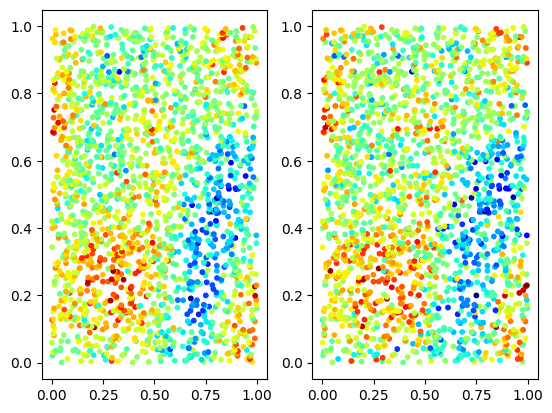

In [29]:

plt.subplot(1, 2, 1)
plt.scatter(stream[:,0], stream[:,2], c=stream[:,1], s=10, cmap='jet')
plt.subplot(1, 2, 2)
plt.scatter(stream[:,0], stream[:,2], c=stream[:,3], s=10, cmap='jet')
plt.show()

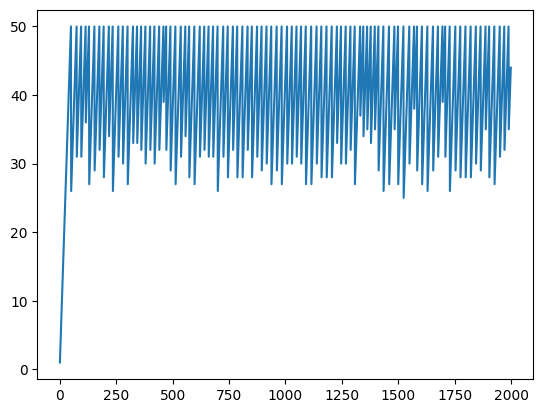

In [30]:
plt.plot(samples_in_memory)